## Predict occurrence of kidney stones using Classification Algorithms

##### We eventually want to predict some target  based on numerous inputs . In this situation, we wish to predict the presence of Kidney Stones, where '1 = we observe a presence' and '0 = we detect no presence.' As a result, this is a 'Binary Classification' issue in which something exists or it does not.

- Import Libraries

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
import pickle
# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
import warnings
warnings.filterwarnings('ignore')

In [18]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


- Loading the csv file

In [20]:
df=pd.read_csv('kindey stone urine analysis.csv')

In [21]:
df

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1


## Data Preprocessing

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


In [23]:
df.isna().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
df['target'].value_counts()

target
0    45
1    34
Name: count, dtype: int64

## Data Visualization

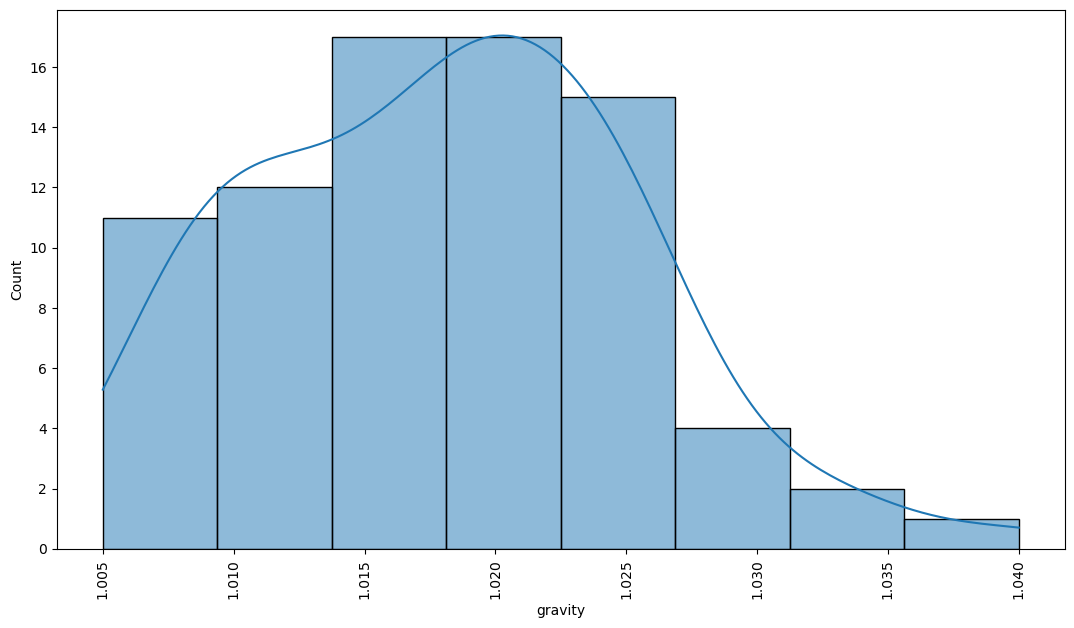

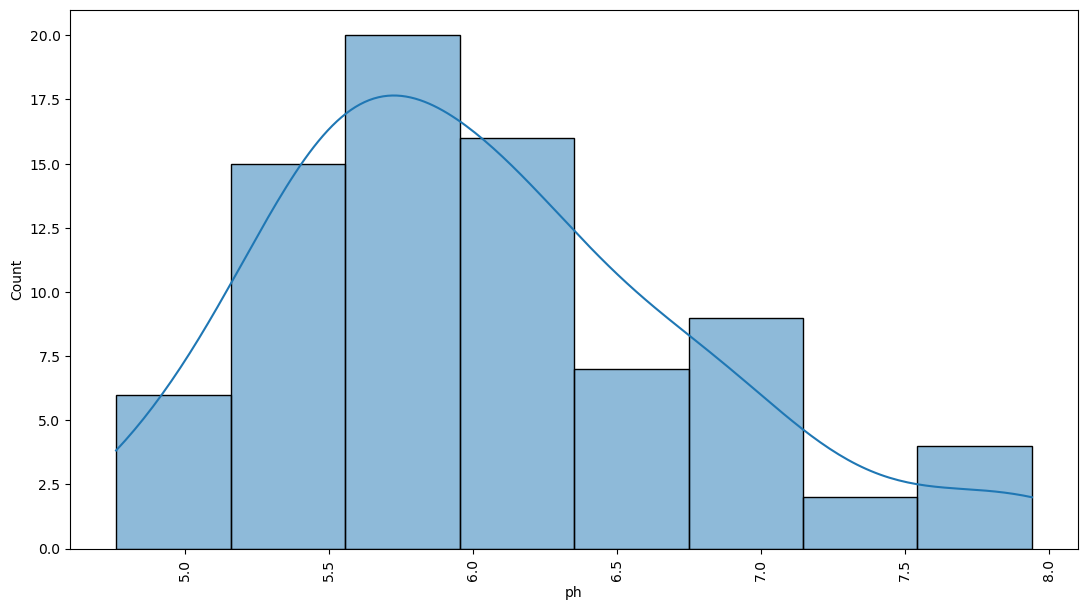

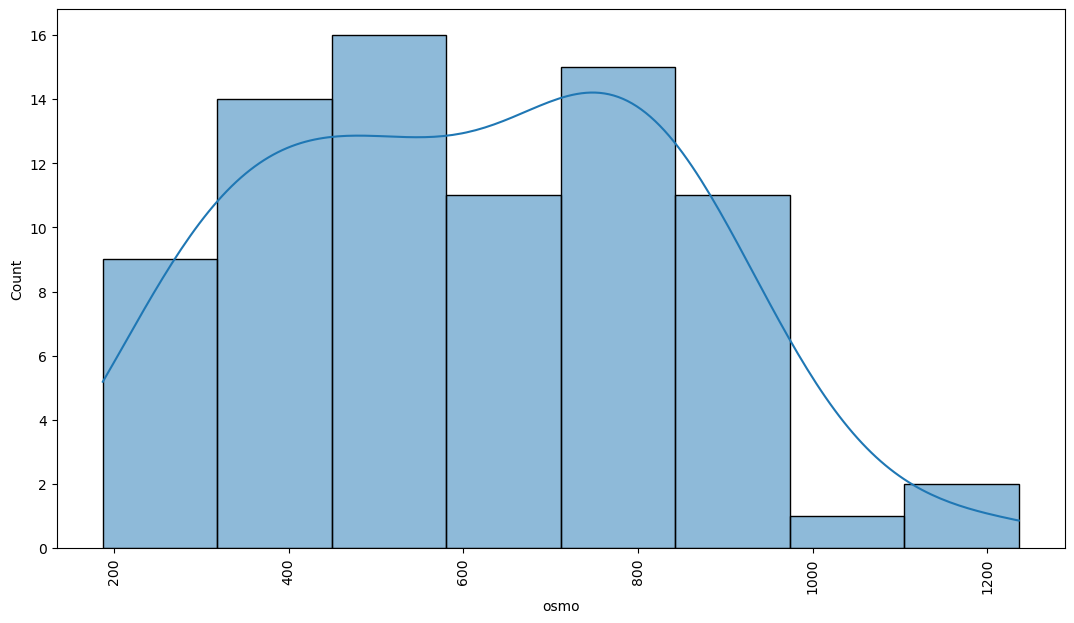

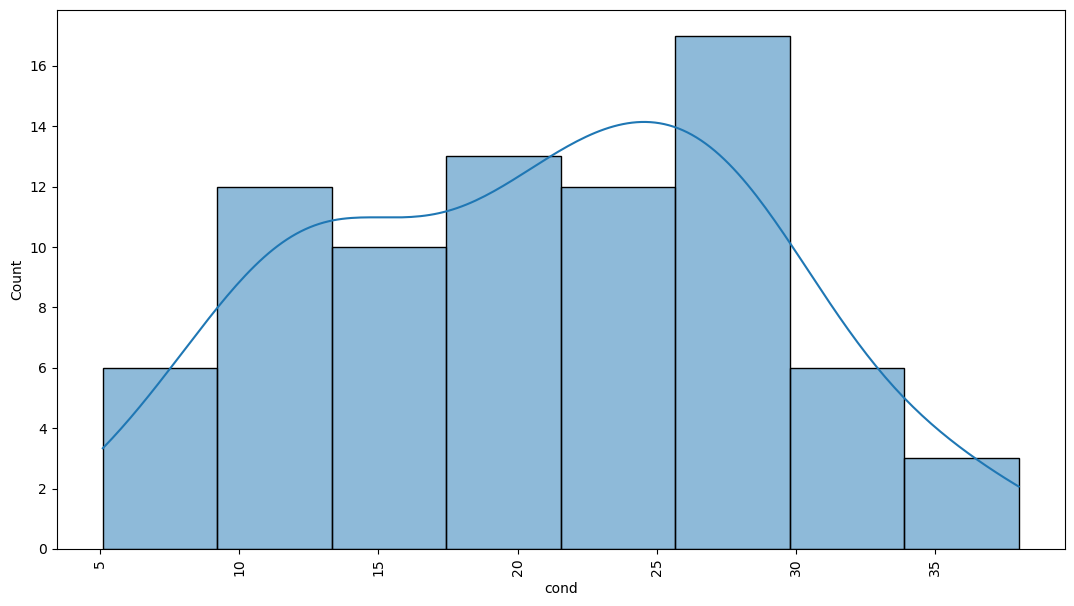

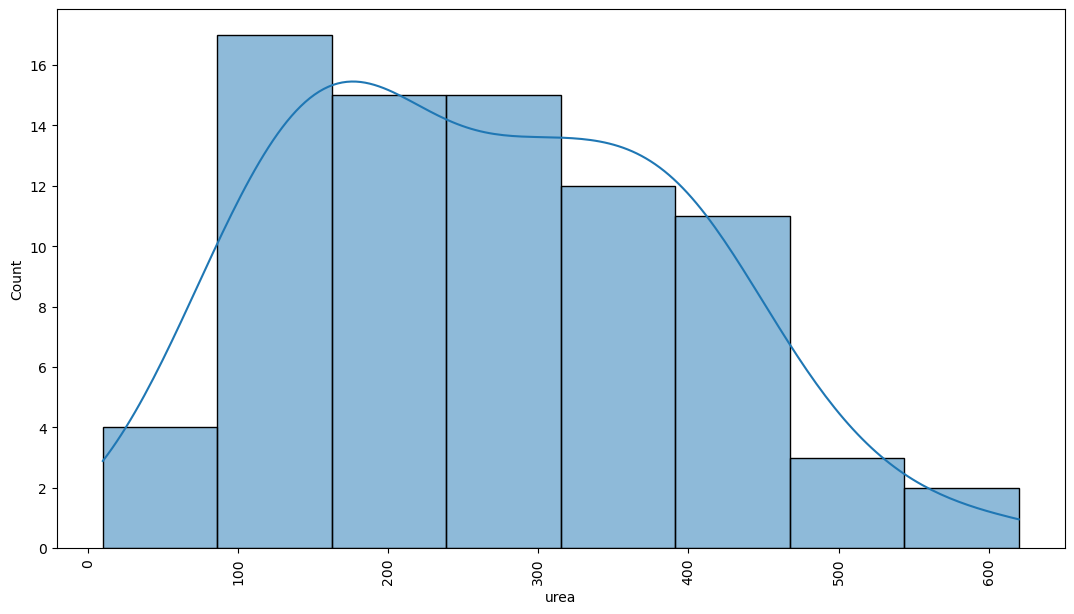

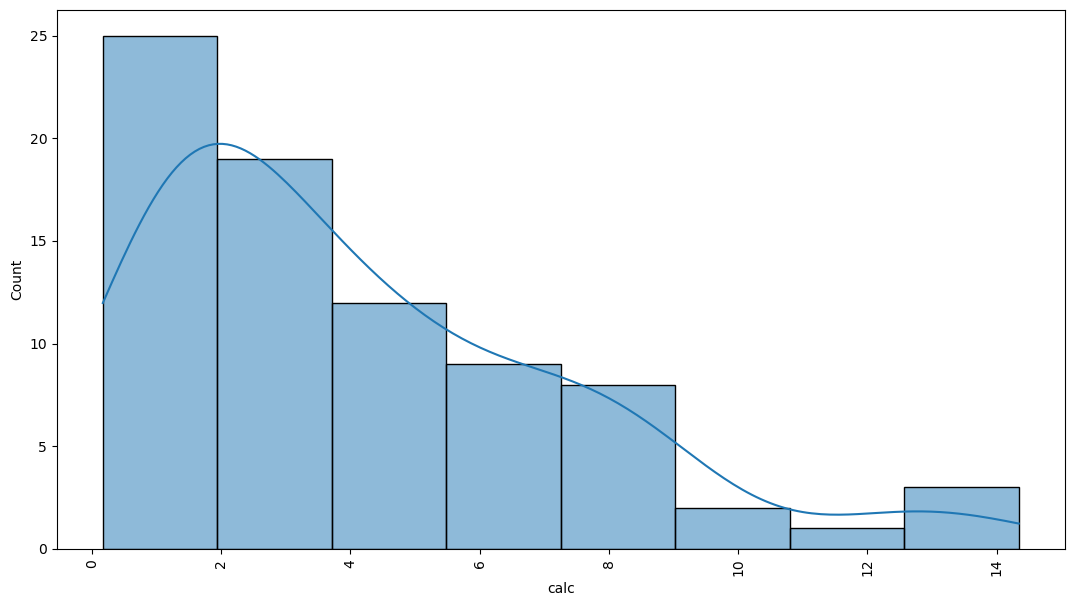

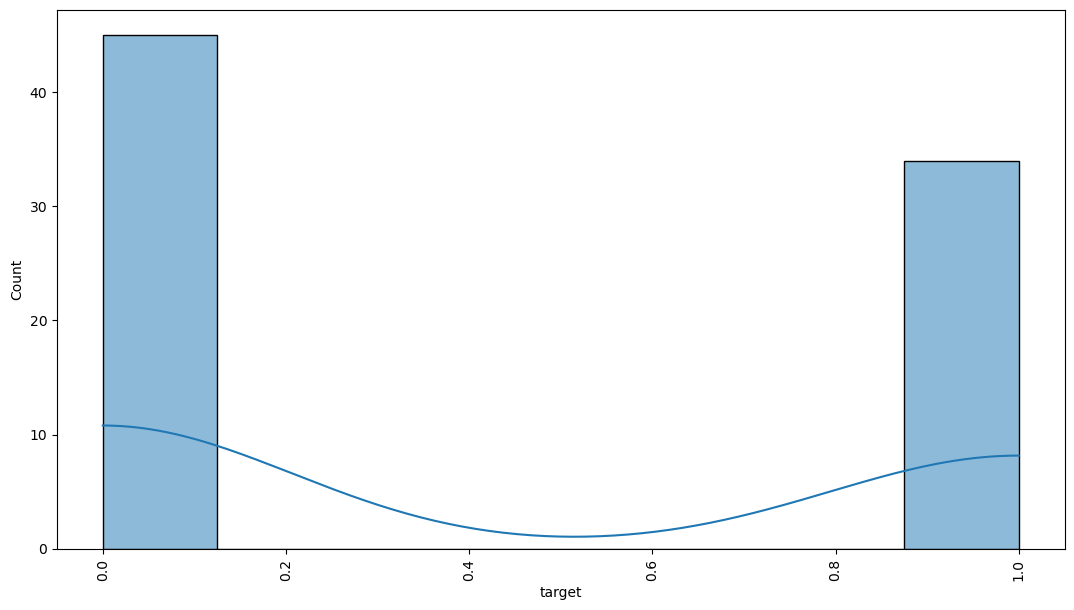

In [26]:
for i in df.columns:
    plt.figure(figsize=(13,7))
    sns.histplot(data = df[i], kde=True, multiple='stack')
    plt.xticks(rotation=90)
    plt.show()

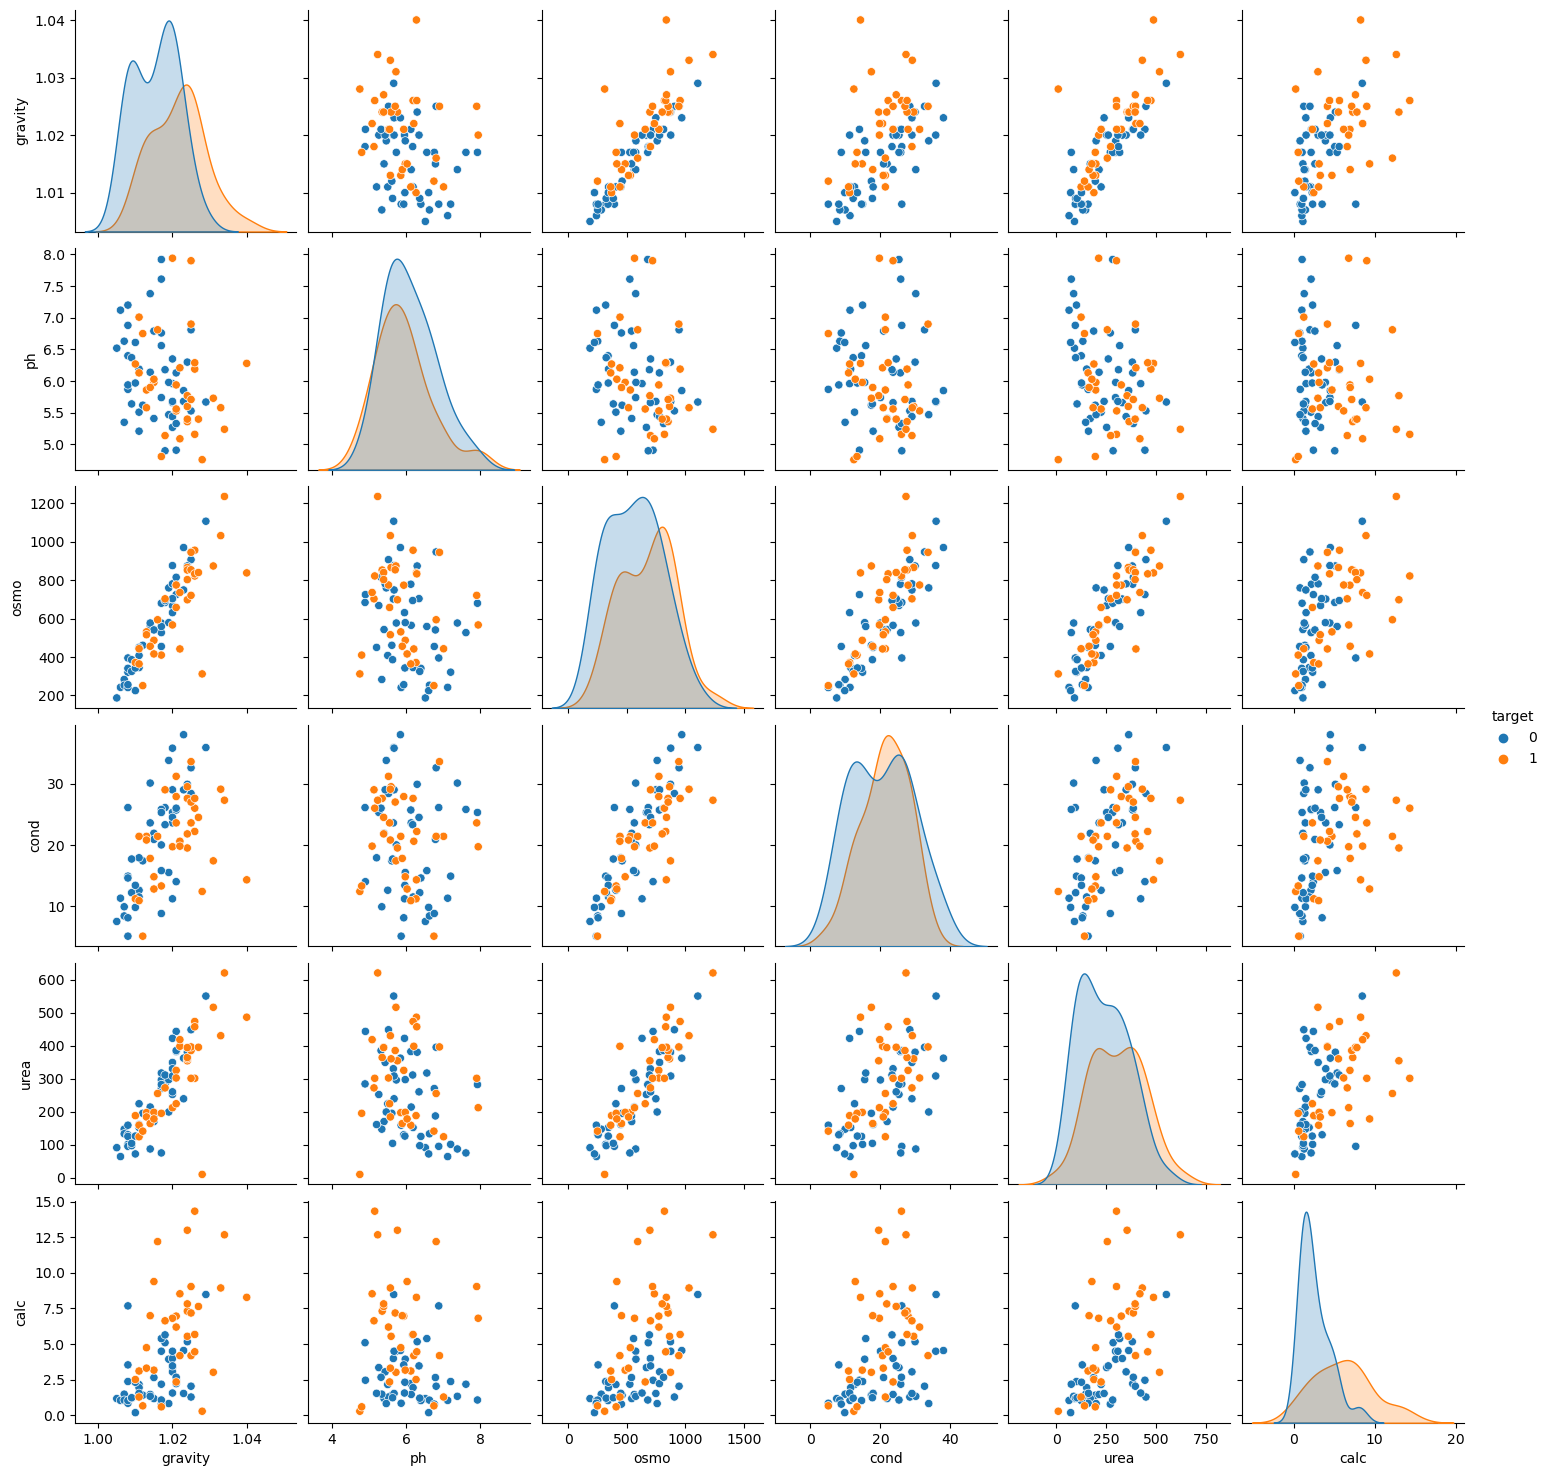

In [27]:
sns.pairplot(df,hue='target')

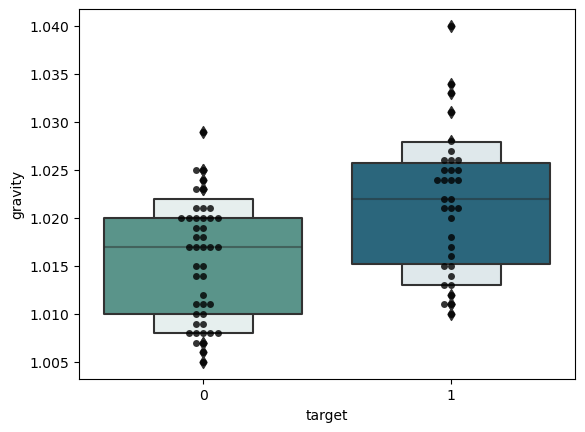

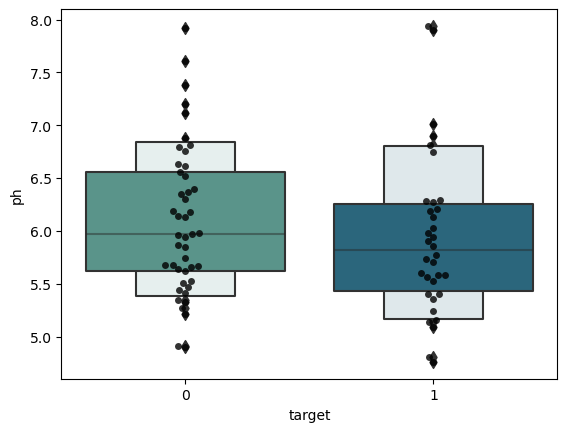

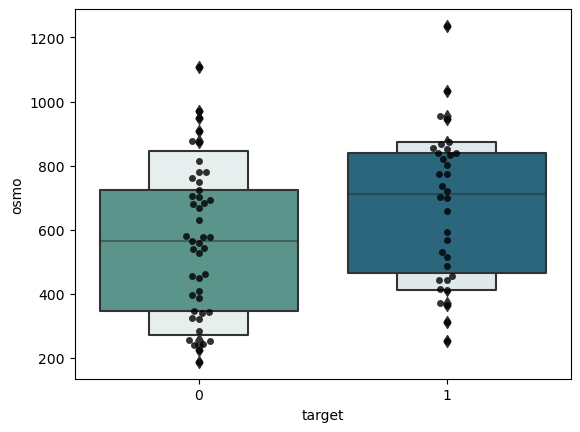

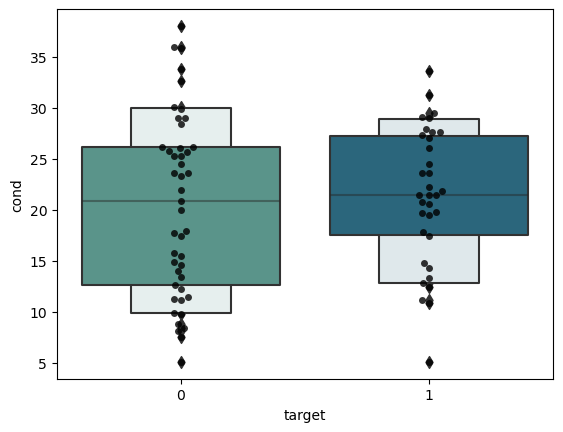

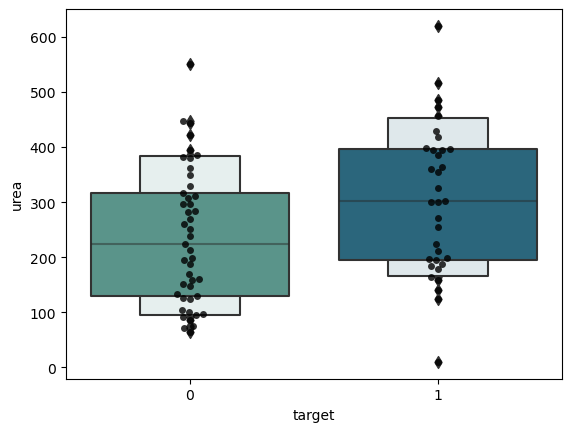

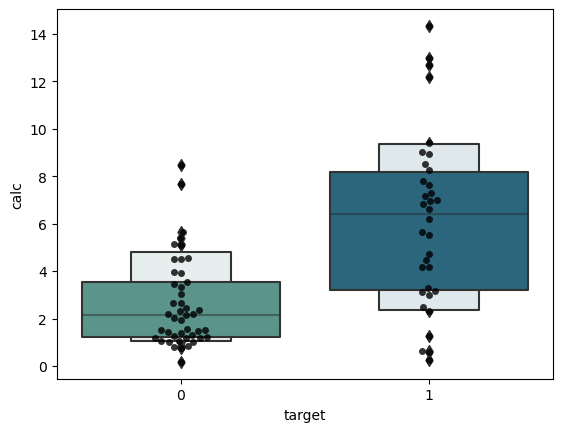

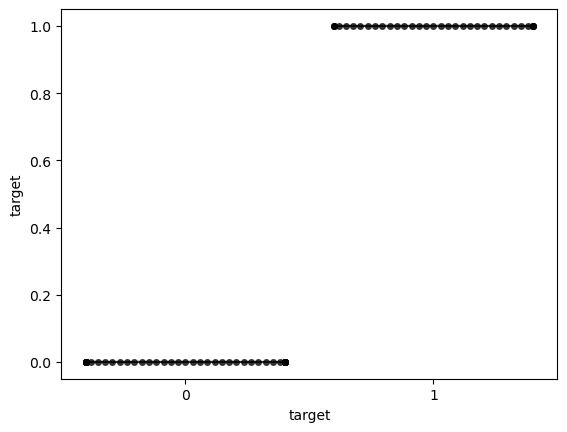

In [28]:
for i in df:
    sns.swarmplot(x = df["target"], y = df[i], color = "black", alpha = 0.8)
    sns.boxenplot(x = df["target"], y = df[i], palette="crest")
    plt.show()

In [29]:
df.corr()

,gravity,ph,osmo,cond,urea,calc,target
gravity,1.000000,-0.253340,0.861466,0.559064,0.823477,0.525699,0.419818
ph,-0.253340,1.000000,-0.238841,-0.097680,-0.275557,-0.119488,-0.112191
osmo,0.861466,-0.238841,1.000000,0.812780,0.871178,0.522979,0.231834
cond,0.559064,-0.097680,0.812780,1.000000,0.495405,0.351030,0.059717
urea,0.823477,-0.275557,0.871178,0.495405,1.000000,0.502327,0.258402
calc,0.525699,-0.119488,0.522979,0.351030,0.502327,1.000000,0.537728
target,0.419818,-0.112191,0.231834,0.059717,0.258402,0.537728,1.000000


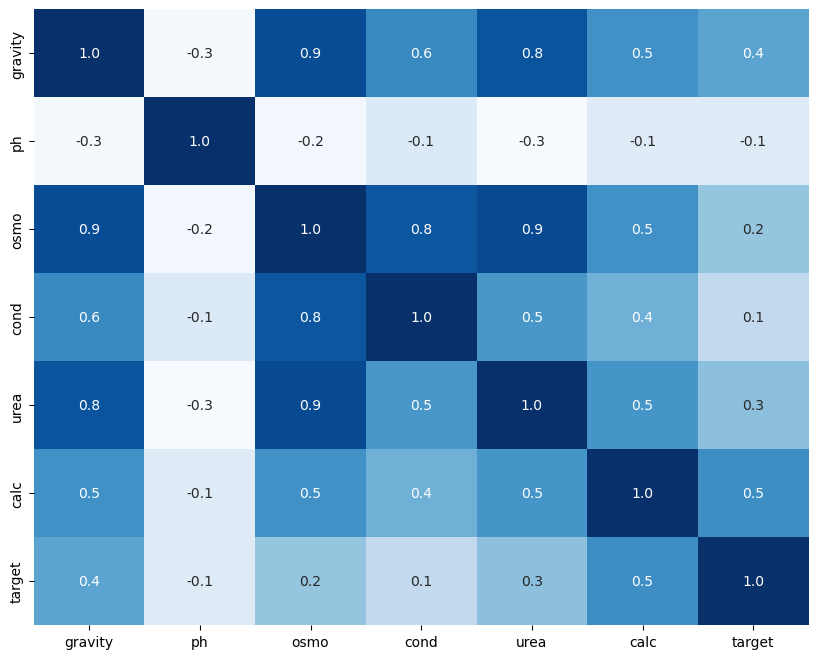

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cbar=False,cmap='Blues',fmt='.1f')
plt.show()

Text(0.5, 1.0, 'Features Correlating with target')

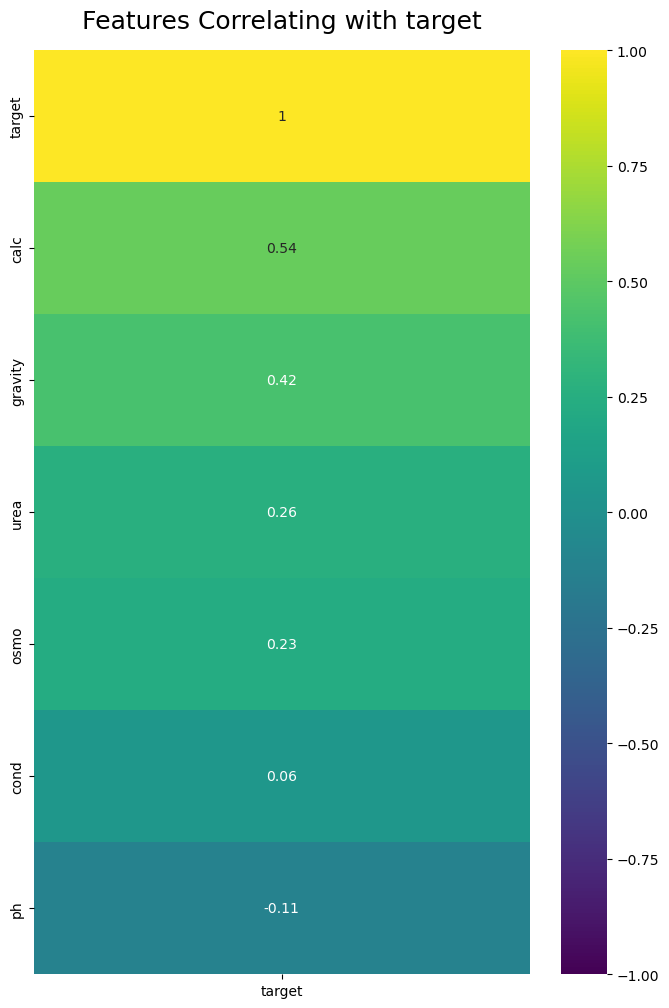

In [31]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with target', fontdict={'fontsize':18}, pad=16)

## Splitting the Dataset

In [32]:
from sklearn.preprocessing import StandardScaler
#Splitting Data

X = df.drop('target', axis = 1)
y = df['target']

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert the target variable to a binary format
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
print(y.shape)
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

(79,)


## Model Preparation

In [33]:
kfold = StratifiedKFold(n_splits=10)
random_state = 42

classifiers = []

classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(XGBClassifier())
classifiers.append(GaussianNB())
classifiers.append(LogisticRegression(random_state = random_state,max_iter=1000))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","GradientBoosting","KNeighboors","ExtraTreesClassifier","XGBClassifier","GaussianNB","LogisticRegression"]})

In [34]:
cv_res.sort_values(by = 'CrossValMeans', ascending = False)

,CrossValMeans,CrossValerrors,Algorithm
6,0.854762,0.109860,ExtraTreesClassifier
3,0.826190,0.123282,RandomForest
5,0.792857,0.128682,KNeighboors
4,0.792857,0.157233,GradientBoosting
7,0.764286,0.198763,XGBClassifier
9,0.764286,0.121148,LogisticRegression
0,0.761905,0.125537,SVC
1,0.747619,0.121964,DecisionTree
8,0.747619,0.142936,GaussianNB
2,0.730952,0.120491,AdaBoost


In [35]:
test_df=pd.read_csv('Test.csv')

In [36]:
GB = GradientBoostingClassifier()
GB.fit(X,y)

GradientBoostingClassifier()

In [37]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [38]:
ET=ExtraTreesClassifier()
ET.fit(X,y)

ExtraTreesClassifier()

In [39]:
XGB=XGBClassifier()
XGB.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
RFC=RandomForestClassifier()
RFC.fit(X,y)

RandomForestClassifier()

In [41]:
ET.score(X_test,y_test)

1.0

In [42]:
GB.score(X_test,y_test)

1.0

In [43]:
RFC.score(X_test,y_test)

1.0

In [44]:
XGB.score(X_test,y_test)

1.0